# Valencia Airbnb Analysis

## Import Dependencies

Importing essential libraries for numerical operations, data manipulation, visualization, and file handling in Python.

In [218]:
# Importing the numpy library for numerical operations
import numpy as np 

# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the matplotlib library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization, built on top of matplotlib
import seaborn as sns

# Importing the os library for interacting with the operating system, useful for file path manipulations
import os

# Importing the warnings library to manage warning messages in the code
import warnings

# Importing the WordCloud class from the wordcloud library to generate word clouds from text data
from wordcloud import WordCloud

# Configuring matplotlib to display plots inline within Jupyter Notebook
%matplotlib inline

In [219]:
# Setting the maximum number of columns to display to None, allowing all columns to be shown in the output
pd.set_option('display.max_columns', None)

# Setting the maximum number of rows to display to None, allowing all rows to be shown in the output
pd.set_option('display.max_rows', None)

## Import Data

Load compressed CSV files into pandas DataFrames for calendar, listings, and reviews data.
Pre-requisite is to merge the review parquets files and convert them into csv 
(Github cannot retain a file bigger than 25MB and by best practices data shouldn't be share there).

In [220]:
df_calendar = pd.read_csv('calendar.csv.gz')
df_listing = pd.read_csv('listings.csv.gz')
df_review = pd.read_csv('reviews.csv.gz')

## Visualize Data

Performing descriptive statistics on the imported DataFrames to gain an initial understanding of the data's structure, variable types, and any potential anomalies or flaws that may require further attention.

In [221]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,48154,2024-06-22,f,$75.00,NaN,3.0,25.0
1,48154,2024-06-23,f,$75.00,NaN,3.0,25.0
2,48154,2024-06-24,f,$75.00,NaN,5.0,22.0
3,48154,2024-06-25,f,$75.00,NaN,5.0,22.0
4,48154,2024-06-26,f,$75.00,NaN,5.0,22.0


In [222]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,48154,https://www.airbnb.com/rooms/48154,20240622134440,2024-06-22,city scrape,Precioso apartamento con wifi,Second floor on a farm from the late 19th cent...,Very close neighborhood to the city's old town...,https://a0.muscache.com/pictures/1109085/9c0d4...,219476,https://www.airbnb.com/users/show/219476,Antonio,2010-09-01,Spain,Un saludo a todos. Espero que os pongáis en co...,within a few hours,100%,96%,f,https://a0.muscache.com/im/users/219476/profil...,https://a0.muscache.com/im/users/219476/profil...,La Saïdia,4,4,"['email', 'phone']",t,t,"Valencia, Spain",MORVEDRE,LA SAIDIA,39.48375,-0.37502,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Host greets you"", ""TV"", ""Microwave"", ""Free s...",$92.00,3,25,3,5,22,25,3.4,24.4,NaN,t,10,22,33,81,2024-06-22,161,31,3,2010-10-12,2024-06-12,4.60,4.69,4.62,4.84,4.78,4.49,4.52,VT-41540-V,f,4,4,0,0,0.97
1,136378,https://www.airbnb.com/rooms/136378,20240622134440,2024-06-23,city scrape,Old City Charm with Modern Comfort,NaN,NaN,https://a0.muscache.com/pictures/pro_photo_too...,591197,https://www.airbnb.com/users/show/591197,Elisa,2011-05-15,"Valencia, Spain",We are a group of three retired women from dif...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/591197/profil...,https://a0.muscache.com/im/users/591197/profil...,Camins al Grau,2,3,['phone'],t,t,NaN,EL MERCAT,CIUTAT VELLA,39.47358,-0.37815,Entire condo,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Long term stays allowed"", ""TV"", ""Ethernet co...",$75.00,28,28,28,28,28,28,28.0,28.0,NaN,t,0,0,0,0,2024-06-23,25,1,0,2011-11-02,2023-06-30,4.46,4.36,4.20,4.64,4.80,4.84,4.56,VT-42161-V,f,2,2,0,0,0.16
2,149715,https://www.airbnb.com/rooms/149715,20240622134440,2024-06-23,city scrape,1900 Style Valencian Beach Home for 10px,Typical town house with 5 bedrooms and 3 and a...,"Surrounded by historic houses, authentic res...",https://a0.muscache.com/pictures/7507244a-87d8...,5947,https://www.airbnb.com/users/show/5947,Susana Barbara,2009-01-03,"Valencia, Spain",I’ve been traveling since I was 15. I moved ...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Poblados Marítimos,1,1,['phone'],t,t,"Valencia, Valencian Community, Spain",CABANYAL-CANYAMELAR,POBLATS MARITIMS,39.46746,-0.32813,Entire home,Entire home/apt,10,4.0,4 baths,5.0,7.0,"[""Room-darkening shades"", ""Long term stays all...",$269.00,2,1125,2,3,1125,1125,2.1,1125.0,NaN,t,9,10,22,260,2024-06-23,259,38,3,2011-07-23,2024-06-17,4.66,4.71,4.55,4.84,4.89,4.59,4.62,Nº TURISMO VT36469V CATEGORIA: standard,f,1,1,0,0,1.65
3,165971,https://www.airbnb.com/rooms/165971,20240622134440,2024-0

In [223]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.596000e+03,9.596000e+03,9.596000e+03,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9078.000000,9421.000000,9081.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,0.0,9596.00000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,7801.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,9596.000000,9596.000000,9596.000000,9596.000000,7801.000000
mean,6.353315e+17,2.024062e+13,2.491254e+08,19.308879,25.341080,39.467505,-0.363516,3.483639,1.294503,1.630506,2.022244,6.180909,489.719154,5.472072,8.241976,582.177053,622.728637,7.111421,606.618977,NaN,11.09108,25.405898,42.770842,163.929762,42.678929,13.690288,1.352022,4.655370,4.714597,4.649738,4.789212,4.792640,4.682028,4.558380,13.553772,12.220092,1.308774,0.018028,1.831073
std,4.740290e+17,0.000000e+00,2.013337e+08,61.998842,115.228716,0.021983,0.023293,1.960911,0.571282,1.140957,1.893459,16.012169,412.272133,14.086968,18.176009,448.557180,443.236375,16.575156,438.345209,NaN,9.85060,19.827111,28.835804,112.947550,75.943947,18.208329,1.953948,0.417981,0.378872,0.437254,0.337401,0.366995,0.369550,0.453025,28.968555,29.210717,3.140352,0.266973,1.675302
min,4.815400e+04,2.024062e+13,5.947000e+03,1.000000,1.000000,39.279116,-0.426282,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.335199e+07,2.024062e+13,5.865364e+07,1.000000,2.000000,39.462440,-0.379762,2.000000,1.000000,1.000000,1.000000,1.000000,120.750000,1.000000,2.000000,260.000000,334.000000,2.000000,330.000000,NaN,2.00000,8.000000,18.000000,63.000000,2.000000,1.000000,0.000000,4.530000,4.637500,4.500000,4.740000,4.750000,4.560000,4.430000,1.000000,1.000000,0.000000,0.000000,0.530000
50%,8.425802e+17,2.024062e+13,1.895266e+08,3.000000,4.000000,39.469370,-0.370905,3.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.800000,365.000000,NaN,8.00000,21.000000,40.000000,152.000000,12.000000,6.000000,0.000000,4.760000,4.810000,4.760000,4.880000,4.900000,4.770000,4.670000,3.000000,1.000000,0.000000,0.000000,1.300000
75%,1.071721e+18,2.024062e+13,4.561352e+08,12.000000,16.000000,39.475485,-0.343460,4.000000,1.500000,2.000000,3.000000,4.000000,1125.000000,3.000000,6.000000,1125.000000,1125.000000,4.900000,1125.000000,NaN,19.00000,42.000000,68.000000,261.000000,47.000000,21.000000,2.000000,4.910000,4.940000,4.930000,4.980000,5.000000,4.930000,4.820000,9.000000,7.000000,1.000000,0.000000,2.700000
max,1.184465e+18,2.024062e+13,5.848199e+08,2616.000000,6382.000000,39.547770,-0.276100,16.000000,11.500000,17.000000,31.000000,365.000000,1125.000000,365.000000,365.000000,1125.000000,1125.000000,365.000000,1125.000000,NaN,30.00000,60.000000,90.000000,365.000000,860.000000,149.000000,15.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,151.000000,151.000000,21.000000,8.000000,12.210000


In [224]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,48154,117554,2010-10-12,180238,Martha,Toni's place was perfect in so many ways. It ...
1,48154,145645,2010-11-28,204240,Mark,Awesome stay!! We'd recommend Toni's apartment...
2,48154,190572,2011-03-01,258565,Domenico,really nice house in a wonderfull position! yo...
3,48154,195081,2011-03-08,213496,Romina & Martín,"Apartamento muy agradable, al igual que su pro..."
4,48154,218435,2011-04-05,340330,Jenna,"Was a great apartment, easy access to the site..."


In [225]:
print('df_listing contains information on %d listings provided by %d hosts.' % (len(df_listing['id'].unique()), len(df_listing['host_id'].unique())))

df_listing contains information on 9596 listings provided by 4599 hosts.


In [226]:
print('df_calendar looks into the future, the first date of observation is %s and the last date is %s.' % (df_calendar['date'].min(), df_calendar['date'].max()))

df_calendar looks into the future, the first date of observation is 2024-06-22 and the last date is 2025-06-22.


In [227]:
df_calendar['price'] = df_calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

/tmp/ipykernel_162674/498546103.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_calendar['price'] = df_calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [228]:
#Count the occurrences where price is less than or equal to 0
zero_or_negative_price_count = (df_calendar['price'] <= 0).sum()

# Print the result
print(f"The number of times 'price' is less than or equal to 0: {zero_or_negative_price_count}")

The number of times 'price' is less than or equal to 0: 0


## Data Preparation

Data manipulation, cleaning, and wrangling are performed in this section to preprocess the datasets, ensuring they are in optimal condition for generating the price correlation matrix and facilitating subsequent analyses and applications.

- Duplicate Removal: Duplicate entries in the df_listing DataFrame are removed to ensure each listing is unique, enhancing the accuracy of the analysis.
- Column Pruning: Columns with all missing values are dropped to streamline the datasets and focus on relevant information.
- Imputation Strategy: Missing values in key columns are filled with the mode or median to preserve data integrity and minimize bias in the analysis. Mode is preferred anytime I'm dealing with integer values, like number of beds, accommodations etc..
- Date Conversion and Extraction: Date columns are converted to datetime format, and month/year are extracted to facilitate effective time-based analyses and trend identification.

In [229]:
# Remove duplicate entries from the listings DataFrame to ensure each listing is unique
df_listing = df_listing.drop_duplicates()

# Drop columns from the listings DataFrame that contain all missing values, as they do not provide useful information
df_listing = df_listing.dropna(axis=1, how='all')

# Count the number of non-null entries in the 'price' column of the calendar DataFrame, which helps assess data completeness
df_calendar.dropna(subset=['price'], axis=0).shape[0]

# Clean the 'price' column in the listings DataFrame by removing dollar signs and commas, converting the values to numeric, and coercing errors to NaN
df_listing['price'] = pd.to_numeric(df_listing['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows from the listings DataFrame where the 'price' column contains NaN values, ensuring only valid price entries remain
df_listing.dropna(subset=['price'], inplace=True)

# Filling missing values in the 'bathrooms', 'bedrooms', and 'beds' columns of the 'df_current' DataFrame 
# with the mode (most frequently occurring value) of each respective column to maintain data integrity and avoid losing entries.
df_listing['bathrooms'] = df_listing['bathrooms'].fillna(df_listing['bathrooms'].mode()[0])
df_listing['bedrooms'] = df_listing['bedrooms'].fillna(df_listing['bedrooms'].mode()[0])
df_listing['beds'] = df_listing['beds'].fillna(df_listing['beds'].mode()[0])

# Converting the 'first_review' and 'last_review' columns to datetime format for better handling of date-related operations 
# in subsequent analyses, allowing for easier calculations and comparisons of review dates.
df_listing['first_review'] = pd.to_datetime(df_listing['first_review'])
df_listing['last_review'] = pd.to_datetime(df_listing['last_review'])

# Calculate the difference in months
df_listing['active_host_months'] = ((df_listing['last_review'].dt.year - df_listing['first_review'].dt.year) * 12 +
                                (df_listing['last_review'].dt.month - df_listing['first_review'].dt.month)).fillna(0).astype(int)

df_listing['review_scores_rating'] = df_listing['review_scores_rating'].fillna(df_listing['review_scores_rating'].median())
df_listing['host_acceptance_rate'] =  df_listing['host_acceptance_rate'].str.replace(',', '').str.replace('%', '').astype(float)

# Convert the 'date' column in the reviews DataFrame to datetime format for easier manipulation and analysis
df_review['date'] = pd.to_datetime(df_review['date'])

# Extract the month from the 'date' column in the reviews DataFrame and create a new 'month' column
df_review['month'] = df_review['date'].dt.month

# Extract the year from the 'date' column in the reviews DataFrame and create a new 'year' column
df_review['year'] = df_review['date'].dt.year

# Convert the 'price' column in the df_calendar DataFrame to numeric format by removing dollar signs and commas,
# ensuring that all values are treated as numbers. Any conversion errors will result in NaN values.
df_calendar['price'] = pd.to_numeric(df_calendar['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Remove any rows from the df_calendar DataFrame where the 'price' column contains NaN values,
# ensuring that only valid price entries remain for further analysis.
df_calendar.dropna(subset=['price'], inplace=True)

# Convert the 'date' column in the df_calendar DataFrame to datetime format, allowing for easier manipulation and analysis of date-related data.
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Extract the month from the 'date' column and create a new 'month' column in the df_calendar DataFrame,
# facilitating time-based analyses and visualizations.
df_calendar['month'] = df_calendar['date'].dt.month

# Extract the year from the 'date' column and create a new 'year' column in the df_calendar DataFrame,
# enabling year-based grouping and analysis of the data.
df_calendar['year'] = df_calendar['date'].dt.year

## Function definitions

Section dedicated to store the function definitions used later on.

In [230]:
def preprocess_and_group(df, cat_cols):
    """
    Preprocess the DataFrame by dropping columns with all NaN values,
    creating dummy variables for specified categorical columns, and
    grouping by a specified column to calculate the mean of numeric columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame to preprocess.
    cat_cols (list): List of categorical column names to create dummy variables for.

    Returns:
    pd.DataFrame: A DataFrame grouped by the specified column with mean values for numeric columns.
    """
    # Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    # Create dummy variables for categorical columns
    for col in cat_cols:
        df = pd.concat([df.drop(col, axis=1), 
                        pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=False).astype(int)], 
                       axis=1)

    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Group by the specified column and calculate the mean for numeric columns
    df_grouped = df.groupby('id')[numeric_cols].mean()

    return df_grouped

In [231]:
def plot_correlation_heatmap(df,
                             cols = ['bathrooms', 'bedrooms', 'beds', 'accommodates', 'host_is_superhost_t', 
                                     'host_is_superhost_f', 'room_type_Hotel room', 'room_type_Private room', 
                                     'room_type_Shared room', 'room_type_Entire home/apt', 
                                     'number_of_reviews_ltm', 'active_host_months', 
                                     'review_scores_rating', 'price'],
                             title='Correlations'):
    """
    Calculate and plot the correlation heatmap for specified columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    cols (list): List of column names to include in the correlation analysis.
    title (str): Title of the heatmap (default is 'Correlations').
    """
    # Calculate the correlation coefficient matrix for the specified columns
    corrs = np.corrcoef(df[cols].values.T)

    # Set the size of the plot
    plt.figure(figsize=(12, 10))  # Adjust the size as needed

    # Set font scale for better readability
    sns.set(font_scale=1.2)

    # Create the heatmap
    hm = sns.heatmap(corrs, cbar=True, annot=True, square=True, fmt='.2f',
                     yticklabels=cols, xticklabels=cols).set_title(title)

    # Print the heatmap plot
    fig = hm.get_figure()
    print(fig)

In [232]:
def plot_listings_by_neighborhood(df, title):
    """
    Create a bar plot showing the number of listings and mean price by neighborhood.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to plot.
    title (str): The title of the plot.
    """
    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a figure with specified size
    plt.figure(figsize=(14, 8))

    # Create a bar plot with specified columns
    barplot = sns.barplot(x='unique_id_count', y='neighbourhood_group_cleansed', data=df, palette='viridis')

    # Add text annotations for the mean price alongside each bar
    for index, row in df.iterrows():
        plt.text(
            row['unique_id_count'] + 0.5,  # Position slightly offset to the right of the bar
            index,  # Align with the y-axis index of each bar
            f"Mean Price: ${row['mean_price']:.2f}",  # Display mean price with a dollar sign and 2 decimal places
            color='black', ha="left", va="center", fontsize=10, fontweight='bold'
        )

    # Set axis labels with enhanced formatting
    plt.xlabel('Number of Listings', fontsize=12, fontweight='bold')
    plt.ylabel('Neighborhood', fontsize=12, fontweight='bold')

    # Set title for better context
    plt.title(title, fontsize=14, fontweight='bold')

    # Show plot
    plt.show()

## Question 1: Which are the most important factors contributing to the current and future prices? 

First, all original dataframes are cleaned then we generate the 'df_current' DataFrame by selecting all relevant columns from the 'df_listing' DataFrame.
This will serve as principal dataframe for representing the current reality. Then, 'df_future' is created joining 'df_calendar' which embeds future prices with all relevant columns from the 'df_listing' DataFrame. Key factors are selected and filtered accross the dataframes and with that we can plot the results. 
At the end, we also try to understand if the reviews can be helpful in identifying any other relevant factor. To do so, we take the 'df_review' comments and just plot a cloud word to visually derive some insights.

In [233]:
# Define a list of key factors that are relevant for analysis, including identifiers, host information, 
# review scores, and property details.
key_factors = ['id', 'host_since', 'active_host_months', 'amenities', 'bathrooms', 'bedrooms', 'beds', 
               'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 
               'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
               'review_scores_location', 'review_scores_value', 'reviews_per_month', 
               'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
               'neighbourhood_group_cleansed', 'property_type', 'room_type', 'instant_bookable', 
               'accommodates']

# Create a new DataFrame 'df_current' by selecting the specified key factors along with the 'price' column 
# from the 'df_listing' DataFrame.
df_current = df_listing[key_factors + ['price']]

# Define a list of categorical columns that will be converted into dummy variables for analysis.
cat_cols = ['room_type', 'host_is_superhost']

# Call the 'preprocess_and_group' function to preprocess 'df_current', 
# which includes dropping NaN columns, creating dummy variables for the specified categorical columns, 
# and grouping by 'id' to calculate the mean for numeric columns.
df_current = preprocess_and_group(df_current, cat_cols)

In [234]:
# Select the relevant columns defined in 'key_factors' from the 'df_listing' DataFrame 
# and create a new DataFrame 'df' containing only those columns.
df = df_listing[key_factors]

# Merge the 'df' DataFrame with the 'df_calendar' DataFrame on the 'id' column from 'df' 
# and the 'listing_id' column from 'df_calendar'. This performs an inner join, 
# ensuring that only rows with matching IDs in both DataFrames are retained in 'df_future'.
df_future = df.merge(df_calendar, left_on='id', right_on='listing_id', how='inner')

# Define a list of categorical columns that will be converted into dummy variables for analysis.
cat_cols = ['room_type', 'host_is_superhost']

# Call the 'preprocess_and_group' function to preprocess 'df_future', 
# which includes dropping columns with all NaN values, creating dummy variables for the specified categorical columns, 
# and grouping by 'id' to calculate the mean for numeric columns. 
df_future_grouped = preprocess_and_group(df_future, cat_cols)

### Correlation Matrix Current Prices

Figure(1200x1000)


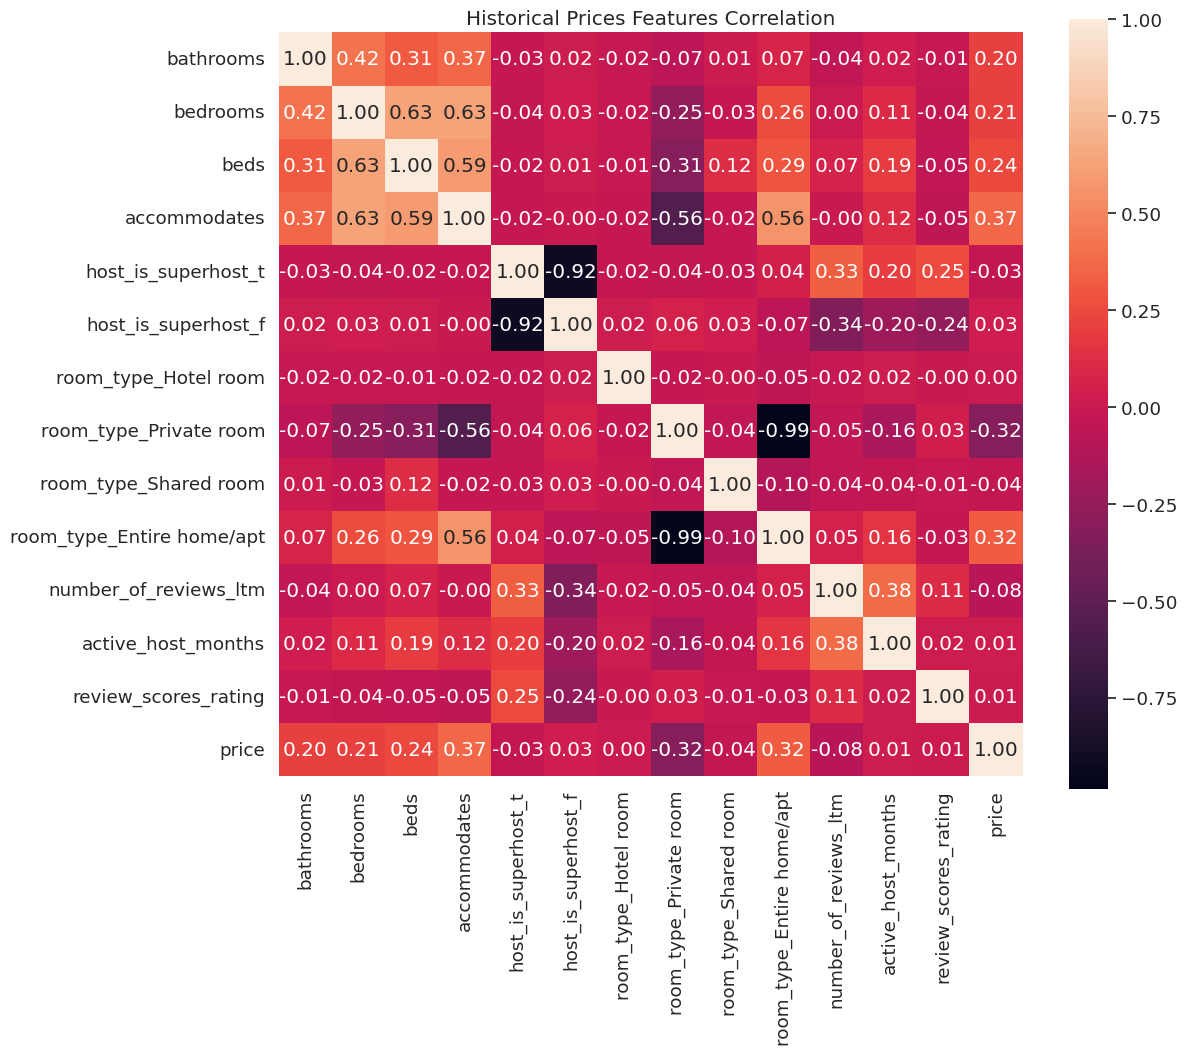

In [235]:
plot_correlation_heatmap(df_current, title='Historical Prices Features Correlation')

### Correlation Matrix Future Prices

Figure(1200x1000)


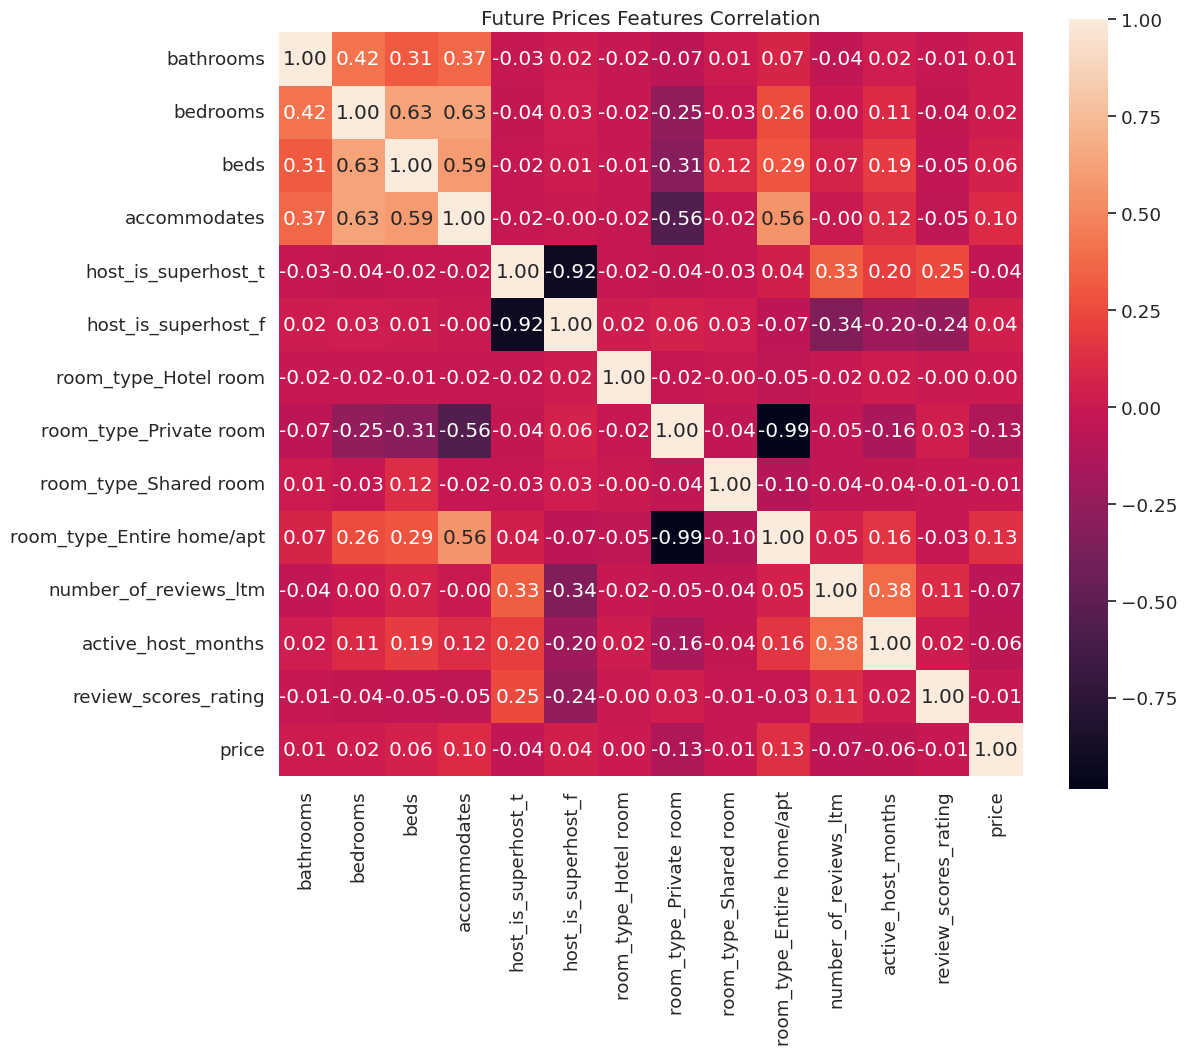

In [236]:
plot_correlation_heatmap(df_future_grouped, title='Future Prices Features Correlation')

### Review WordCloud

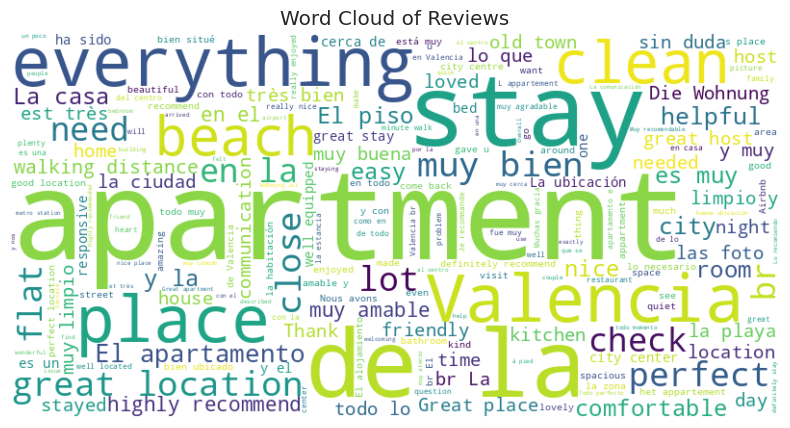

In [237]:
# Convert the comments column to a single string
comments_text = " ".join(df_review['comments'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Reviews')
plt.show()

## Question 2: How has Airbnb's popularity changed over the years in the city?

To address this question, I will calculate the unique counts of reviewers and listings from the 'df_review' DataFrame, grouping the data by year. Subsequently, I will create a horizontal plot using a pivot table to effectively visualize the results, ensuring that the presentation is visually appealing for the article.

In [238]:
# Group the reviews DataFrame by 'year' and count the number of unique 'listing_id's for each year,
# resulting in a DataFrame that shows how many different listings received reviews each year.
df_review_listings = df_review.groupby('year')['listing_id'].nunique().reset_index()

# Group the reviews DataFrame by 'year' and count the number of unique 'reviewer_id's for each year,
# resulting in a DataFrame that shows how many different reviewers wrote reviews each year.
df_review_reviewers = df_review.groupby('year')['reviewer_id'].nunique().reset_index()

# Merge the two DataFrames (df_review_reviewers and df_review_listings) on the 'year' column,
# creating a combined DataFrame that contains both the unique reviewer and listing counts for each year.
df_combined = pd.merge(df_review_reviewers, df_review_listings, on='year')

# Melt the combined DataFrame to long format, with 'year' as the identifier variable,
# and 'reviewer_id' and 'listing_id' as value variables. This results in a DataFrame that is easier to visualize.
df_melted = df_combined.melt(id_vars='year', value_vars=['reviewer_id', 'listing_id'], 
                              var_name='count_unique', value_name='count')

# Pivot the melted DataFrame to a wide format, setting 'count_unique' as the index,
# 'year' as the columns, and 'count' as the values. This allows for a clearer comparison of counts across years.
df_pivot = df_melted.pivot(index='count_unique', columns='year', values='count')

# Display the final pivoted DataFrame, which shows the unique counts of reviewers and listings for each year.
df_pivot

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count_unique,,,,,,,,,,,,,,,
listing_id,1,6,27,94,168,297,576,965,1465,1861,1767,2381,3597,5666,6356
reviewer_id,2,28,188,859,2072,4930,10444,18765,31727,42890,14751,32124,68204,103925,64573


## Question 3: What is the distribution of Airbnb listings by room type, and does it correlate with the number of reviews?

The code calculates the number of unique listings (listing_count) for each room type and their average price (mean_price). This provides insights into the market share of each room type.

By calculating the percentage of total listings for each room type, the analysis helps understand the relative popularity of different room types within the Airbnb market.

The code merges the listings and reviews data to analyze how many reviews each room type has received (cum_number_of_reviews). This indicates the level of engagement or customer interest for each room type.

The final output combines the listing statistics with the review statistics, allowing for a comprehensive view of how room types perform in terms of both availability and customer feedback.

In [239]:
# Group the 'df_listing' DataFrame by 'room_type' and aggregate the data to calculate:
# 1. The count of unique listings for each room type (listing_count).
# 2. The average price of listings for each room type (mean_price).
# The results are sorted by the number of listings in descending order and reset the index for a clean DataFrame.
df_room_type = pd.DataFrame(
    df_listing.groupby('room_type').agg(
        listing_count=('id', 'nunique'),  # Count unique listing IDs for each room type
        mean_price=('price', 'mean')      # Calculate the mean price for each room type
    ).sort_values(by='listing_count', ascending=False).reset_index()
)

# Calculate the total count of listings across all room types to use for percentage calculations.
total_count = df_room_type['listing_count'].sum()

# Calculate the percentage of total listings for each room type and round to two decimal places.
# Convert the percentage to a string and append a '%' sign for better readability.
df_room_type['percentage_listing'] = round((df_room_type['listing_count'] / total_count) * 100, 2)
df_room_type['percentage_listing'] = df_room_type['percentage_listing'].astype(str) + ' %'

# Round the mean price to two decimal places and convert it to a string, appending a '$' sign.
df_room_type['mean_price'] = round(df_room_type['mean_price'], 2).astype(str) + ' $'

# Select and reorder the relevant columns for the final DataFrame.
df_room_type = df_room_type[['room_type', 'listing_count', 'percentage_listing', 'mean_price']]

# Merge the 'df_listing' DataFrame with the 'df_review' DataFrame on the listing ID,
# using an inner join to keep only those listings that have corresponding reviews.
merged_df = pd.merge(df_listing, df_review, left_on='id', right_on='listing_id', how='inner') 

# Print the number of rows in each of the original DataFrames and the merged DataFrame to provide context.
print(f"Listing rows: {df_listing.shape[0]}, Review rows: {df_review.shape[0]}, Merged rows: {merged_df.shape[0]}")

Listing rows: 9082, Review rows: 409547, Merged rows: 395810


In [240]:
# Group the merged DataFrame by 'room_type' and aggregate the data to calculate:
# 1. The cumulative number of reviews for each room type (cum_number_of_reviews).
# The 'id_y' column (which represents the review IDs from the merged DataFrame) is used to count the number of reviews.
df_room_type_number_reviews = merged_df.groupby(['room_type']).agg(
    cum_number_of_reviews=('id_y', 'size')  # Count the number of reviews for each room type
).reset_index()

# Calculate the total number of reviews across all room types for percentage calculations.
total_count = df_room_type_number_reviews['cum_number_of_reviews'].sum()

# Calculate the percentage of total reviews for each room type and round to two decimal places.
# Convert the percentage to a string and append a '%' sign for better readability.
df_room_type_number_reviews['percentage_reviews'] = round((df_room_type_number_reviews['cum_number_of_reviews'] / total_count) * 100, 2)
df_room_type_number_reviews['percentage_reviews'] = df_room_type_number_reviews['percentage_reviews'].astype(str) + ' %'

# Merge the reviews count DataFrame with the existing room type DataFrame to combine listing and review statistics.
df_room_type = pd.merge(df_room_type, df_room_type_number_reviews, on='room_type', how='inner')

# Transpose the DataFrame to swap the axes, making it easier to read and analyze the results.
df_room_type.T

,0,1,2,3
room_type,Entire home/apt,Private room,Shared room,Hotel room
listing_count,6445,2589,37,11
percentage_listing,70.96 %,28.51 %,0.41 %,0.12 %
mean_price,148.83 $,56.68 $,43.7 $,122.55 $
cum_number_of_reviews,316746,78456,195,413
percentage_reviews,80.02 %,19.82 %,0.05 %,0.1 %


## Question 4: What's the distribution across Neighborhoods of listings and their price (current and future)?

To address this question, I will group both the current and future DataFrames by neighborhood groups, calculating the unique counts of listing IDs and the average prices. To effectively visualize these results, I will create a horizontal bar chart that displays the listing values in descending order.

In [241]:
# Group the 'df_listing' DataFrame by 'neighbourhood_group_cleansed' to analyze the distribution of listings 
# across different neighborhood groups. Aggregate the data to calculate:
# 1. The count of unique listings for each neighborhood group (unique_id_count).
# 2. The average price of listings for each neighborhood group (mean_price).
# The results are sorted by the number of unique listings in descending order for better readability.
# Finally, the index is reset to create a clean DataFrame structure.
df_neighbourhood_distribution = pd.DataFrame(df_listing.groupby('neighbourhood_group_cleansed').agg(
    unique_id_count=('id', 'nunique'),  # Count the number of unique listing IDs in each neighborhood group
    mean_price=('price', 'mean')        # Calculate the mean price of listings in each neighborhood group
).sort_values(by='unique_id_count', ascending=False).reset_index())  # Sort by unique_id_count and reset the index

#### Barchart for Current Prices

/tmp/ipykernel_162674/40324140.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='unique_id_count', y='neighbourhood_group_cleansed', data=df, palette='viridis')


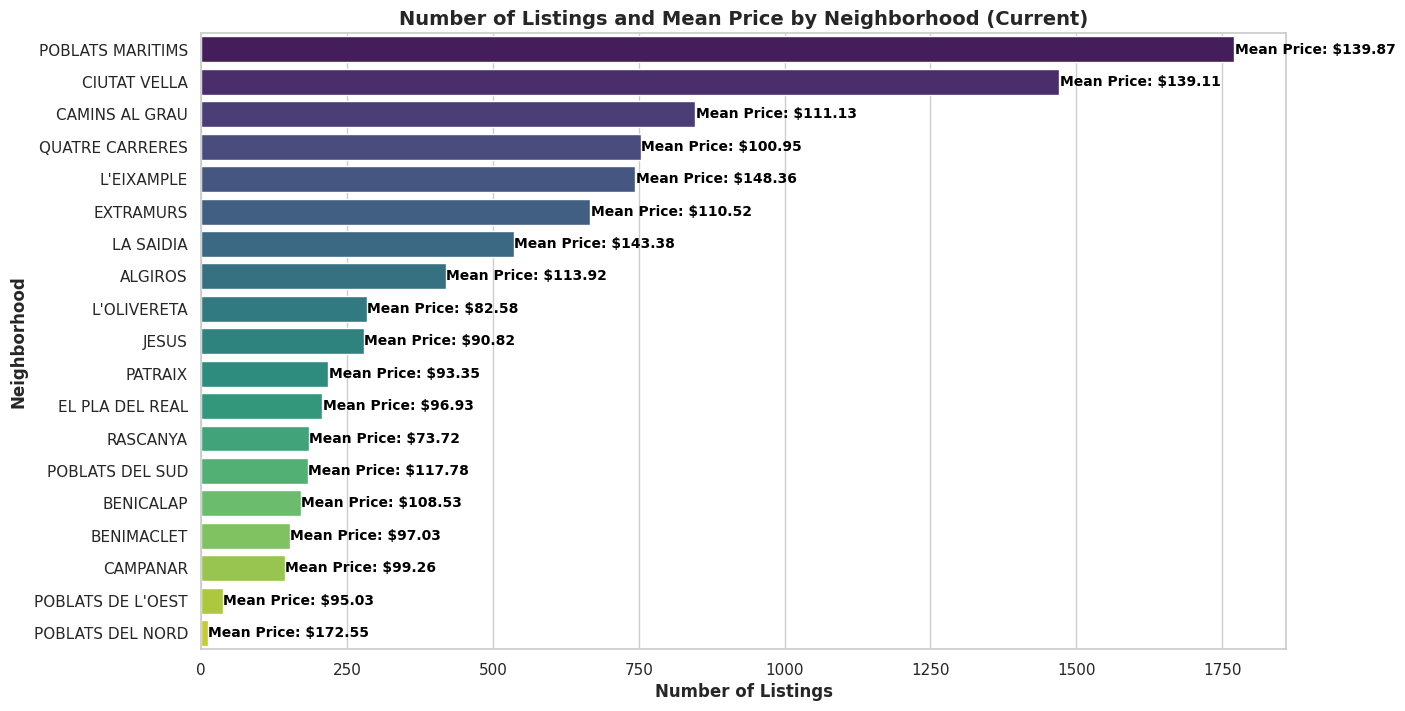

In [242]:
plot_listings_by_neighborhood(df_neighbourhood_distribution, 'Number of Listings and Mean Price by Neighborhood (Current)')

In [243]:
# Group the 'df_future' DataFrame by 'neighbourhood_group_cleansed' to analyze listings in different neighborhood groups.
# Aggregate the data to calculate:
# 1. The count of unique listings for each neighborhood group (unique_id_count).
# 2. The average price of listings for each neighborhood group (mean_price).
# The results are sorted in descending order by the number of unique listings for better visibility.
# Finally, the index is reset to create a clean DataFrame structure.
df_future_grouped = df_future.groupby('neighbourhood_group_cleansed').agg(
    unique_id_count=('id', 'nunique'),  # Count the number of unique listing IDs in each neighborhood group
    mean_price=('price', 'mean')        # Calculate the mean price of listings in each neighborhood group
).sort_values(by='unique_id_count', ascending=False).reset_index()  # Sort by unique_id_count and reset the index

#### Barchart for Future Prices

/tmp/ipykernel_162674/40324140.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='unique_id_count', y='neighbourhood_group_cleansed', data=df, palette='viridis')


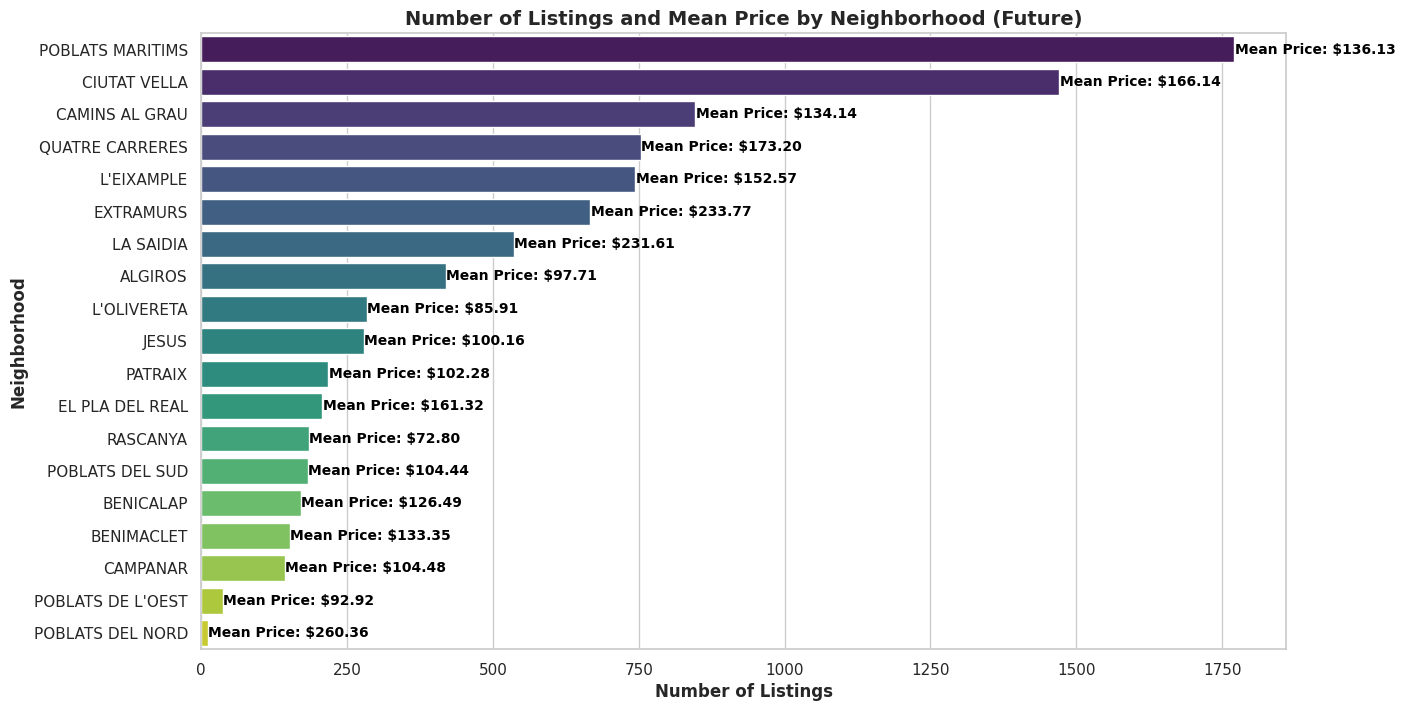

In [244]:
plot_listings_by_neighborhood(df_future_grouped, 'Number of Listings and Mean Price by Neighborhood (Future)')

## Question 5: What's the evolution of the Average price overtime by Neighborhoods?

Summarize the average price of listings and the corresponding number of reviews over time for each neighborhood. To visualize the results, I will create a line chart to illustrate the year-over-year evolution, using a loop to iterate through each neighborhood group.

In [245]:
# Create a total fictitious neighborhood by summing up all values for each year
total_neighborhood = merged_df.groupby('year').agg(
    number_of_reviews=('id_y', 'size'),  # Counting the number of records
    mean_price=('price', 'mean')
).reset_index()

total_neighborhood['neighbourhood_group_cleansed'] = 'Valencia'

# Concatenate the total neighborhood DataFrame with the original DataFrame grouped by year and neighborhood
grouped_df = merged_df.groupby(['year', 'neighbourhood_group_cleansed']).agg(
    number_of_reviews=('id_y', 'size'),
    mean_price=('price', 'mean')
).reset_index()

# Concatenate the total neighborhood DataFrame to the grouped DataFrame
df = pd.concat([grouped_df, total_neighborhood], ignore_index=True)

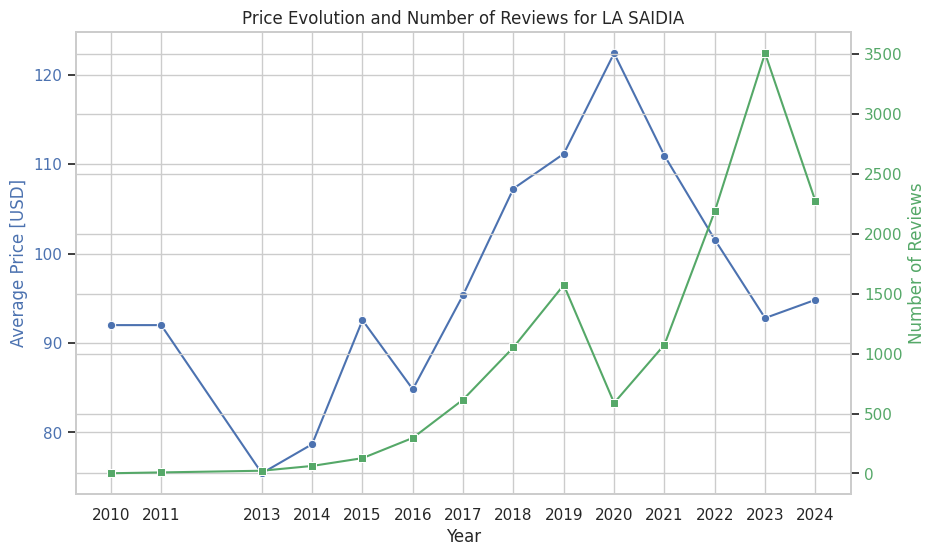

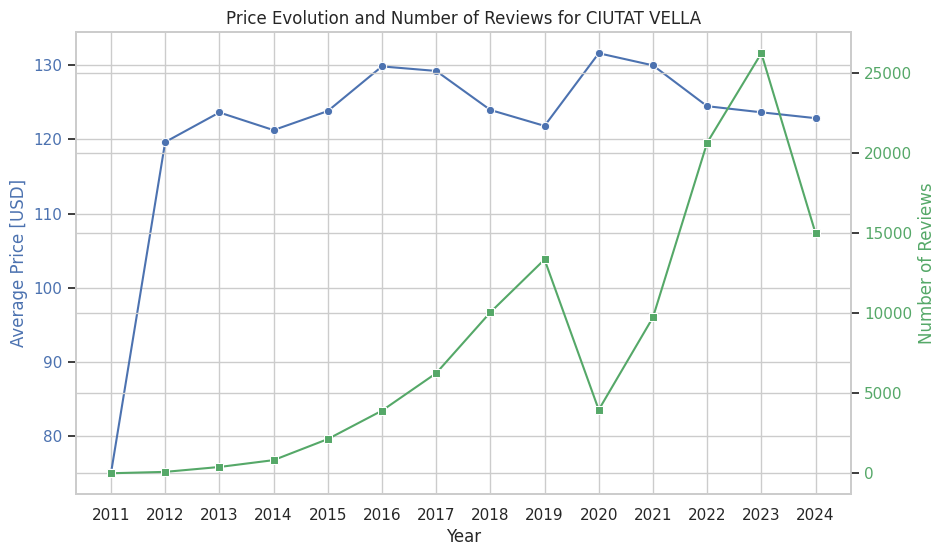

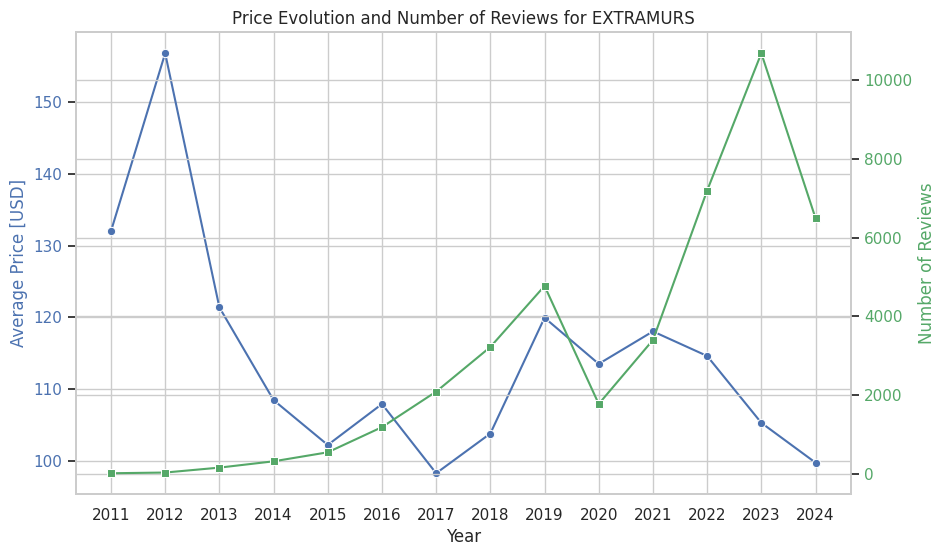

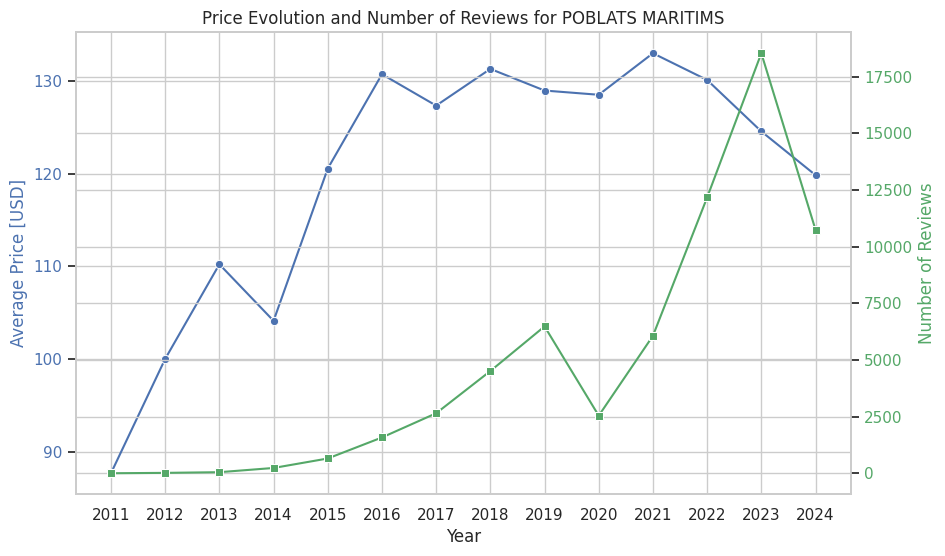

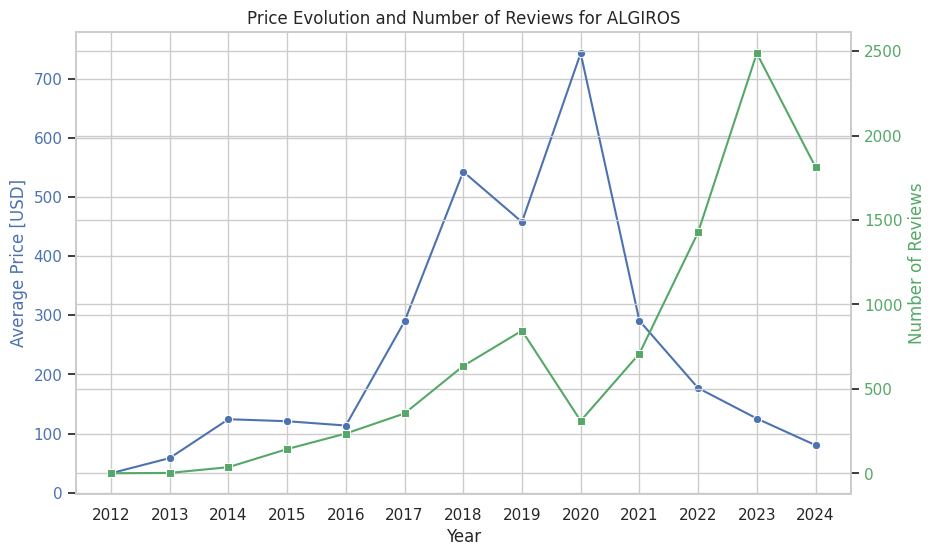

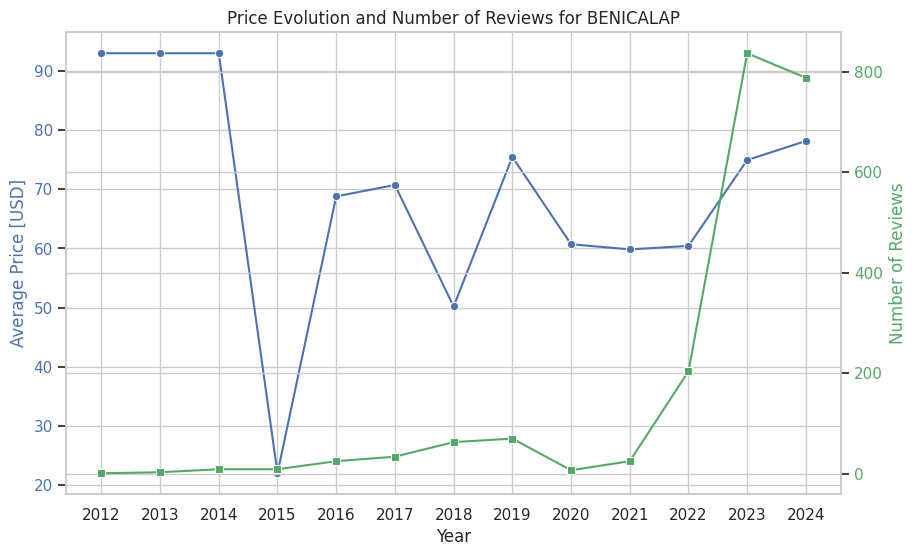

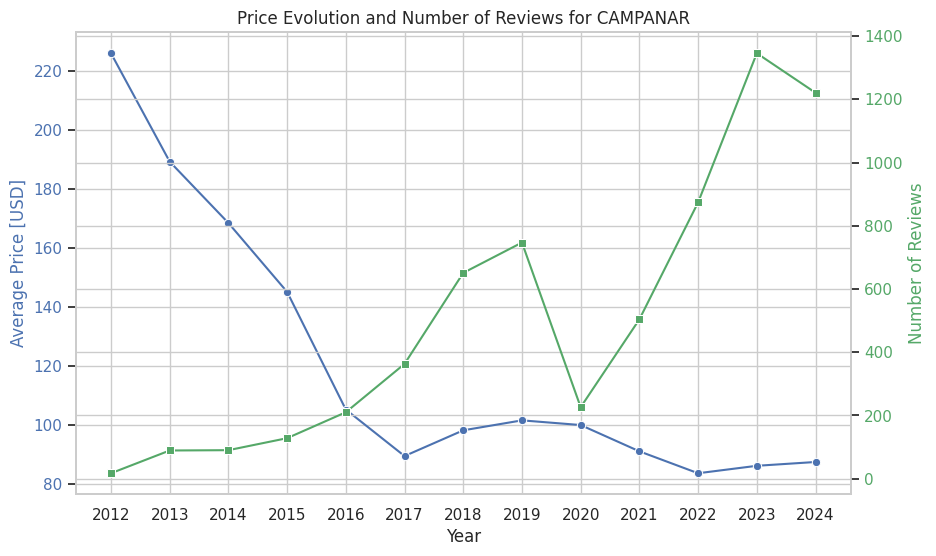

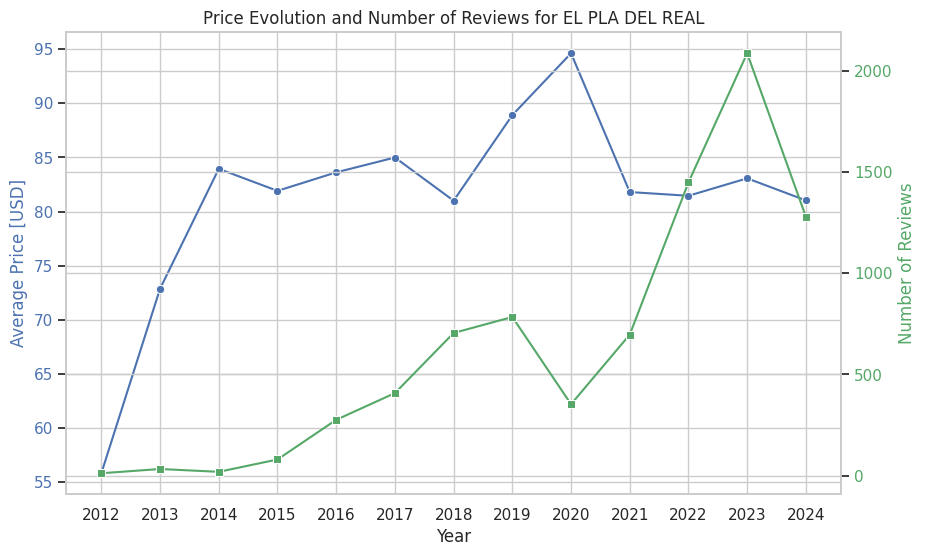

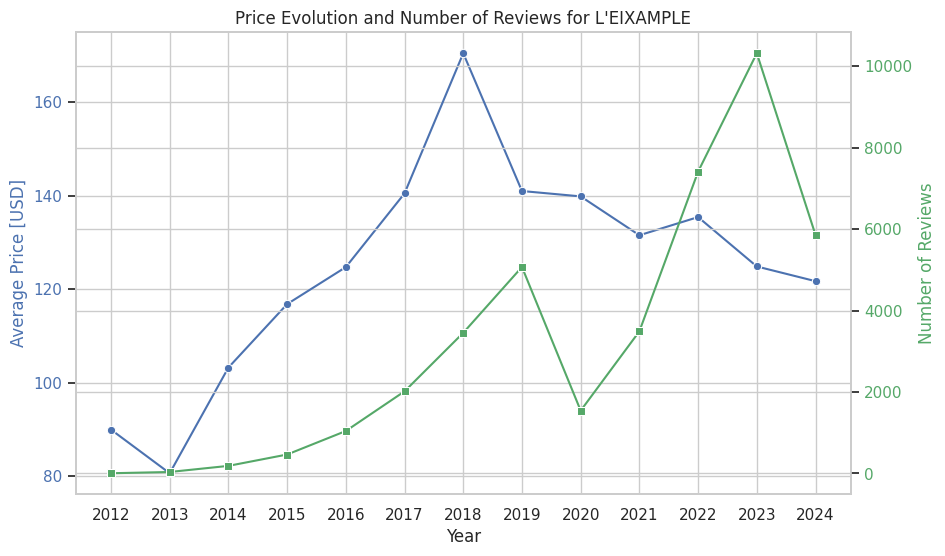

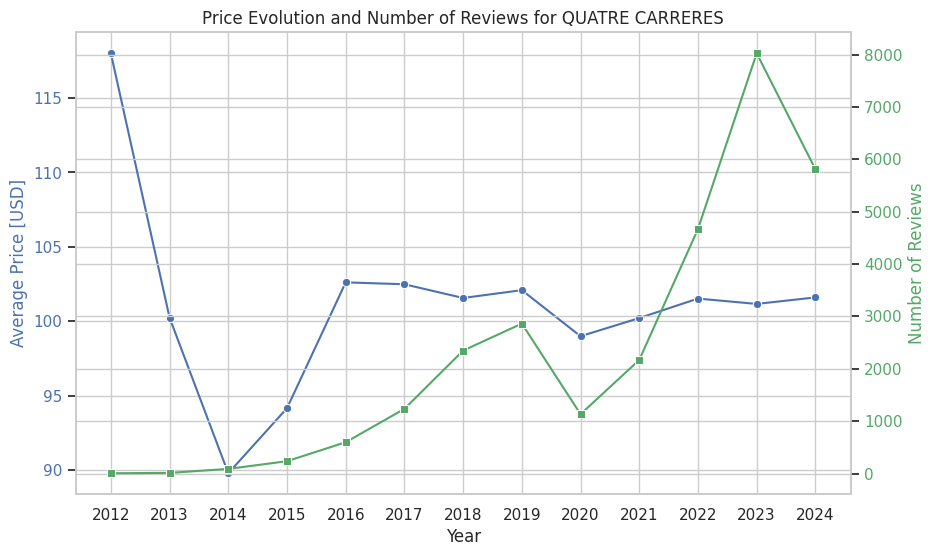

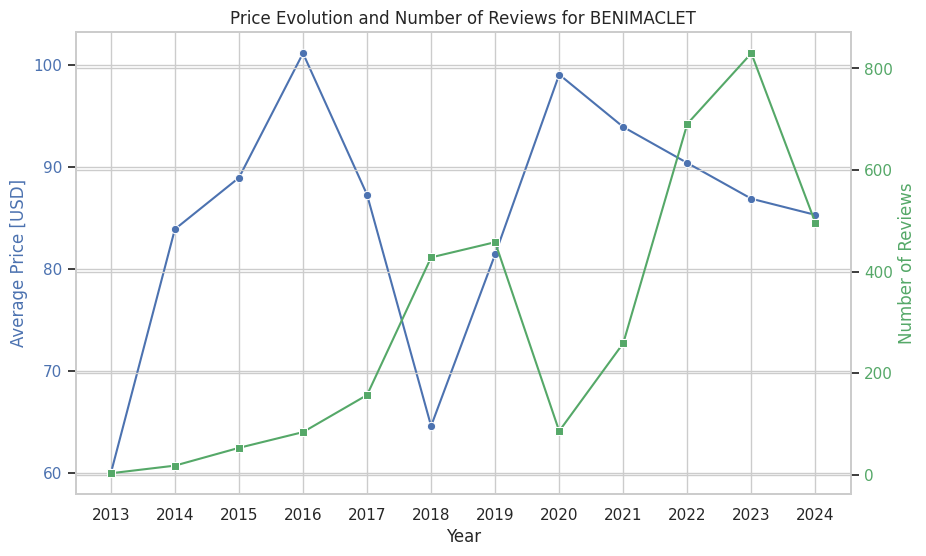

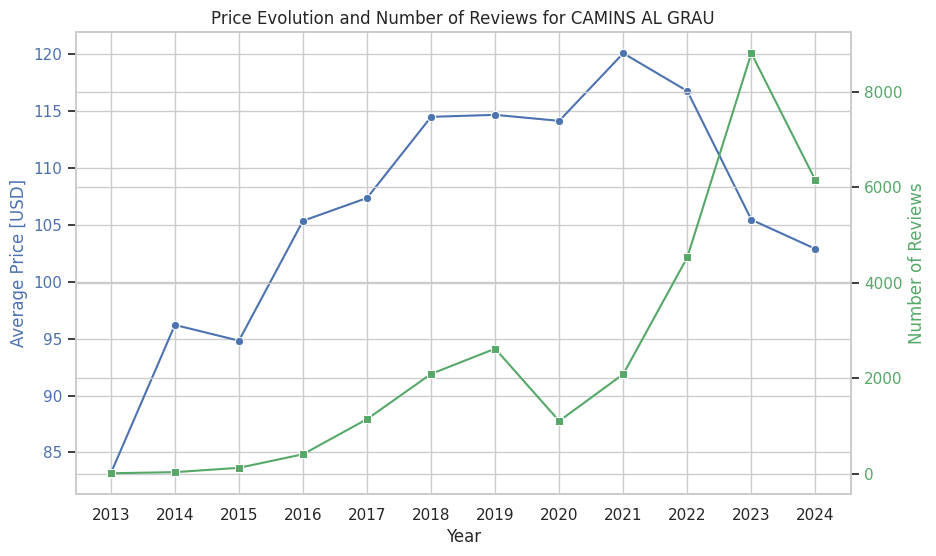

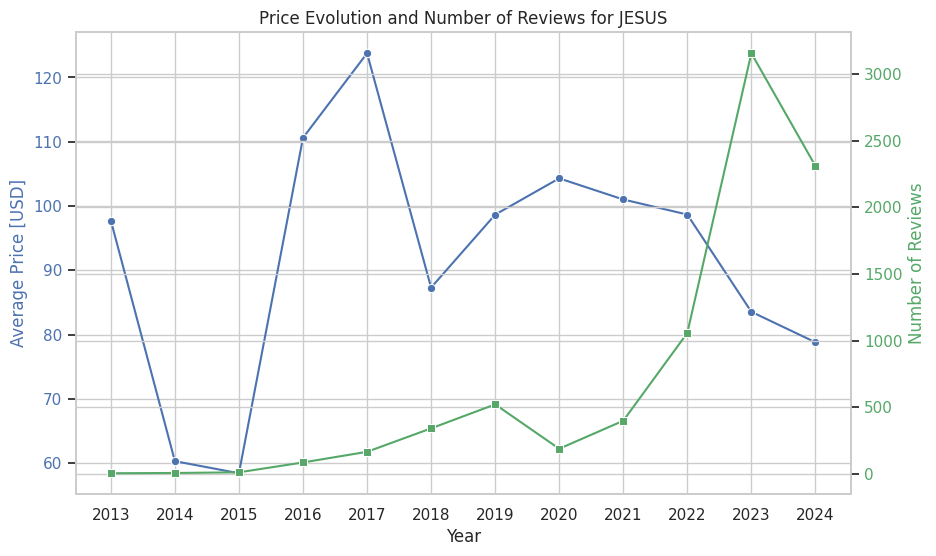

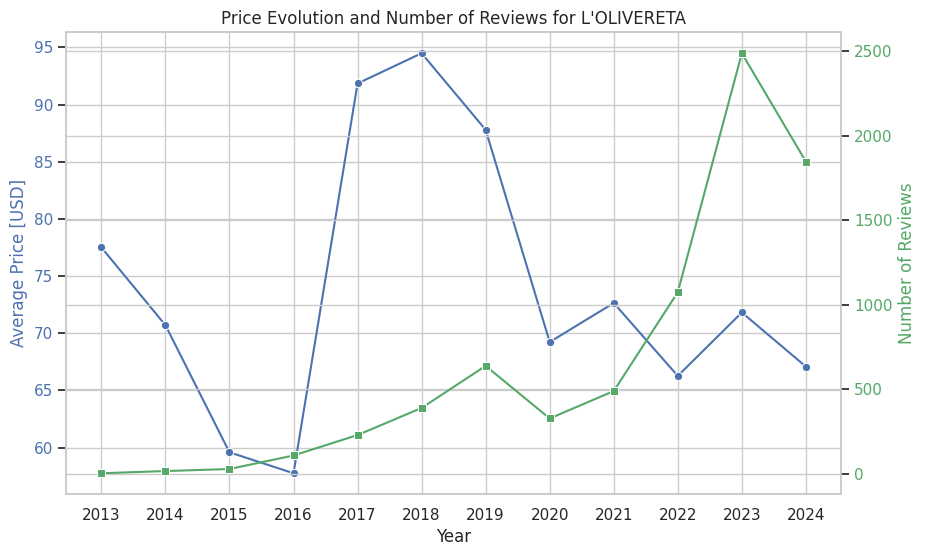

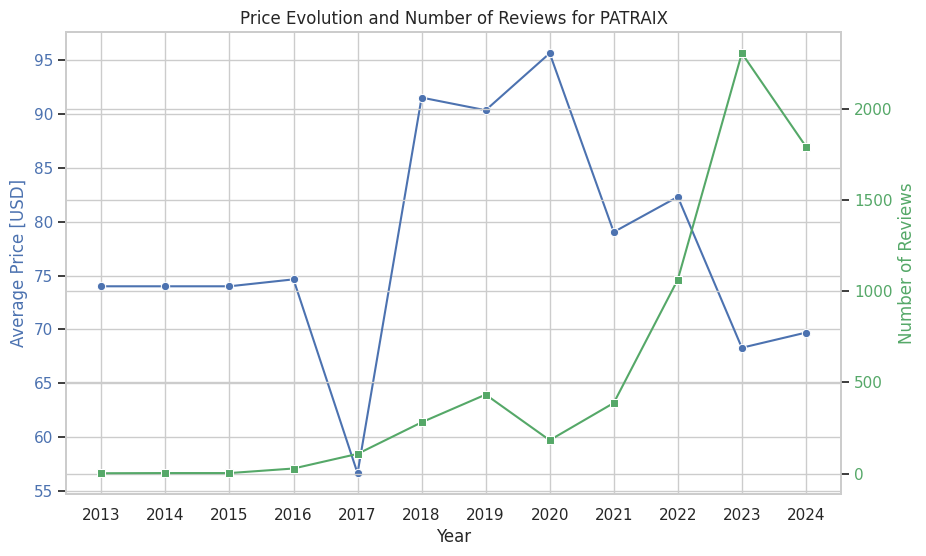

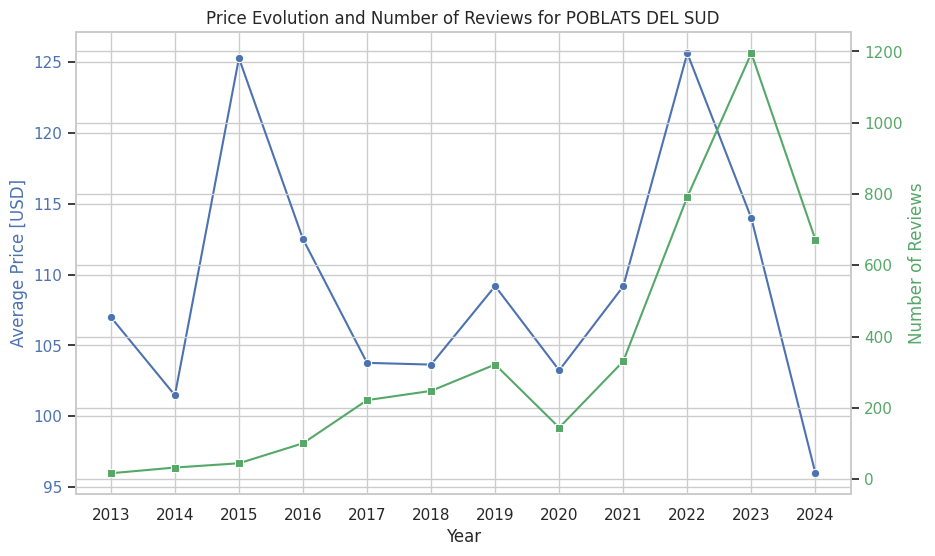

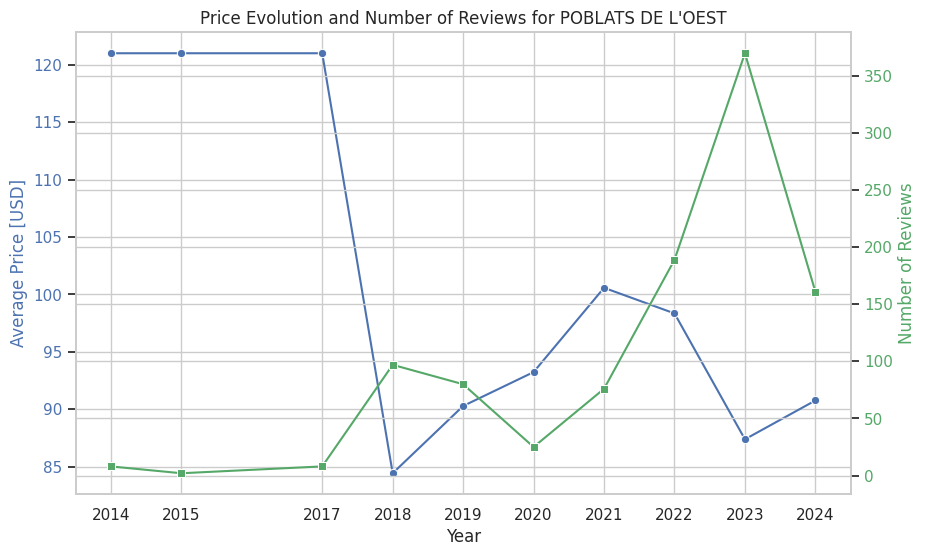

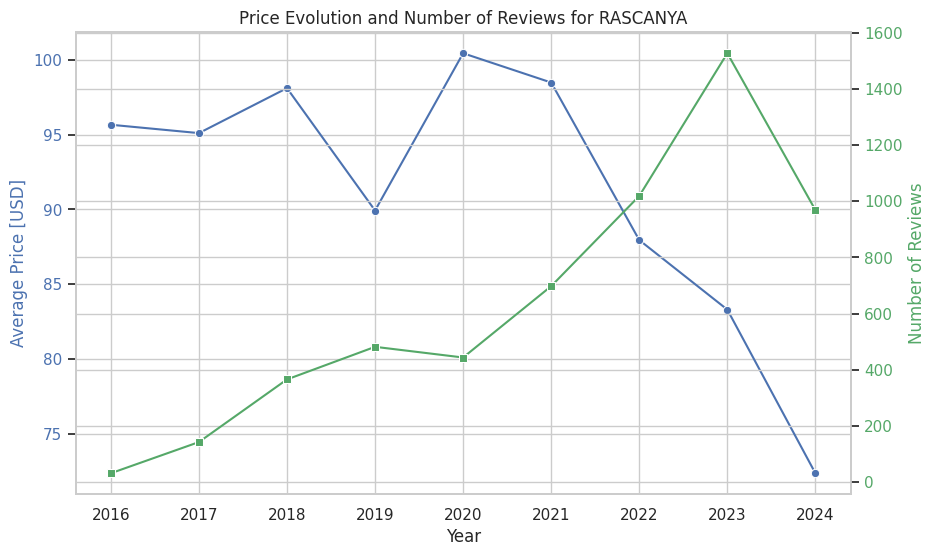

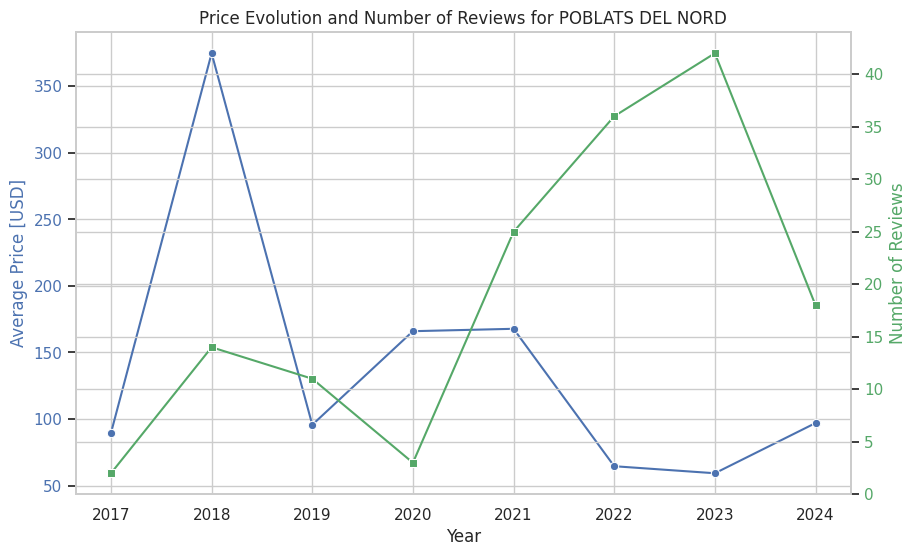

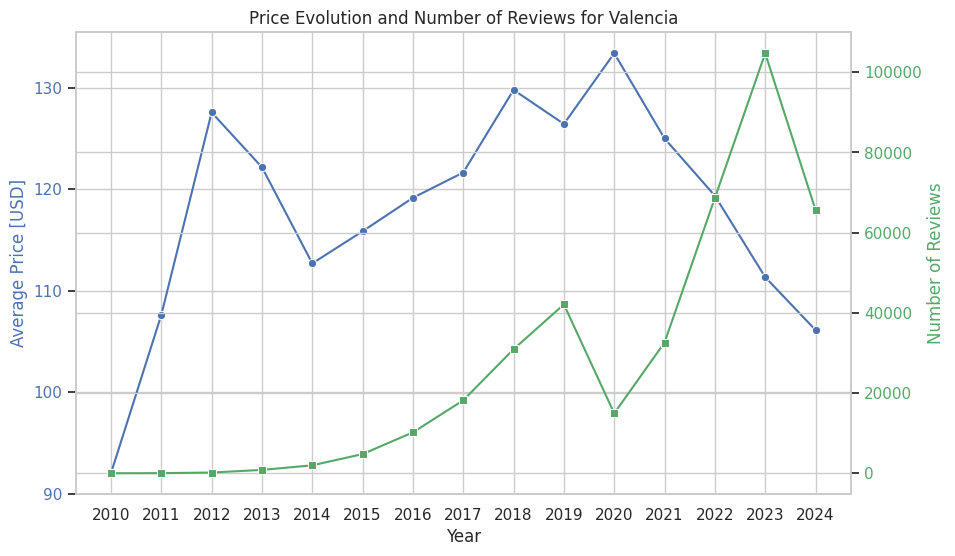

In [246]:
# Iterate over each unique neighborhood in the 'neighbourhood_group_cleansed' column of the DataFrame
for neighborhood in df['neighbourhood_group_cleansed'].unique():
    # Filter the DataFrame for the current neighborhood
    df_neighborhood = df[df['neighbourhood_group_cleansed'] == neighborhood]

    # Set up the plot for the current neighborhood
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a new figure and axis with specified size

    # Plot average price on the left y-axis
    sns.lineplot(data=df_neighborhood, x='year', y='mean_price', marker='o', color='b', ax=ax1)
    ax1.set_xlabel('Year')  # Set the x-axis label
    ax1.set_ylabel('Average Price [USD]', color='b')  # Set the left y-axis label and color
    ax1.tick_params(axis='y', labelcolor='b')  # Set the color of the ticks on the left y-axis

    # Create a secondary y-axis for number of reviews
    ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
    sns.lineplot(data=df_neighborhood, x='year', y='number_of_reviews', marker='s', color='g', ax=ax2)
    ax2.set_ylabel('Number of Reviews', color='g')  # Set the right y-axis label and color
    ax2.tick_params(axis='y', labelcolor='g')  # Set the color of the ticks on the right y-axis

    # Customize the plot
    plt.title(f'Price Evolution and Number of Reviews for {neighborhood}')  # Set the plot title
    ax1.set_xticks(df_neighborhood['year'])  # Set x-ticks to the years present in the neighborhood data
    plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
    ax1.grid(visible=True)  # Enable grid lines on the plot

    # Show the plot
    plt.show()  # Display the plot for the current neighborhood